In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore")
pd.pandas.set_option("display.max_columns",None)

#Create Dataframe
df=pd.read_csv("EasyVisa.csv")
print(df.shape)

(25480, 12)


In [2]:
# Data Cleaning
# Handling missing values
# 1.Handling missing values
# 2.Handling Duplicates
# 3.Check Data Types
# 4.Understand the Dataset

In [3]:
# Check Null Values
# df.isnull()
# Features with nan values

features_with_nan=[features for features in df.columns if df[features].isnull().sum()>1]
for feature in features_with_nan:
    print(feature,np.round(df[feature].isnull().mean()*100,5),' %missing values')

In [4]:
#Check for Duplicate values
df.duplicated().sum()

0

In [5]:
#Remove case id from the dataset as it cannot be used for modelling
df.drop('case_id',inplace = True, axis=1)

In [6]:
# Feature Engineering

In [7]:
# Feature Extraction

In [8]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [9]:
#Importing data class from datetime module

from datetime import date 

#creating the date object of today's date
todays_date = date.today()
current_year = todays_date.year

In [10]:
current_year

2024

In [11]:
df['company_age']= current_year-df['yr_of_estab']

In [12]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,company_age
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,17
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,22
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,16
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,127
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,19


In [13]:
df.drop('yr_of_estab',inplace=True,axis=1)

In [14]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,company_age
0,Asia,High School,N,N,14513,West,592.2029,Hour,Y,Denied,17
1,Asia,Master's,Y,N,2412,Northeast,83425.6500,Year,Y,Certified,22
2,Asia,Bachelor's,N,Y,44444,West,122996.8600,Year,Y,Denied,16
3,Asia,Bachelor's,N,N,98,West,83434.0300,Year,Y,Denied,127
4,Africa,Master's,Y,N,1082,South,149907.3900,Year,Y,Certified,19


In [15]:
# Types of features
# Numeric features

num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print("Num of Numerical Features :",len(num_features))

Num of Numerical Features : 3


In [16]:
# Categorical Features 
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print("Num of Categorical Features :",len(categorical_features))

Num of Categorical Features : 8


In [17]:
# Discrete Features 
discrete_features = [feature for feature in num_features if len(df[feature].unique())<=25 ]
print("Num of Discrete Features :",len(discrete_features))

Num of Discrete Features : 0


In [18]:
# Continous Features 

continous_features = [feature for feature in num_features if feature not in discrete_features]
print("Num of Continous Features :",len(continous_features))

Num of Continous Features : 3


In [19]:
# Train test split 
x = df.drop('case_status',axis=1)
y = df['case_status']

In [20]:
y.head()

0       Denied
1    Certified
2       Denied
3       Denied
4    Certified
Name: case_status, dtype: object

In [21]:
x.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,company_age
0,Asia,High School,N,N,14513,West,592.2029,Hour,Y,17
1,Asia,Master's,Y,N,2412,Northeast,83425.6500,Year,Y,22
2,Asia,Bachelor's,N,Y,44444,West,122996.8600,Year,Y,16
3,Asia,Bachelor's,N,N,98,West,83434.0300,Year,Y,127
4,Africa,Master's,Y,N,1082,South,149907.3900,Year,Y,19


In [22]:
# As value of y is categorical hence need to convert it into Denied is encoded as 1 and certified is encoded as 0
y = np.where(y=='Denied',1,0)

In [23]:
y = pd.DataFrame(y)
y.head()

,0
0,1
1,0
2,1
3,1
4,0


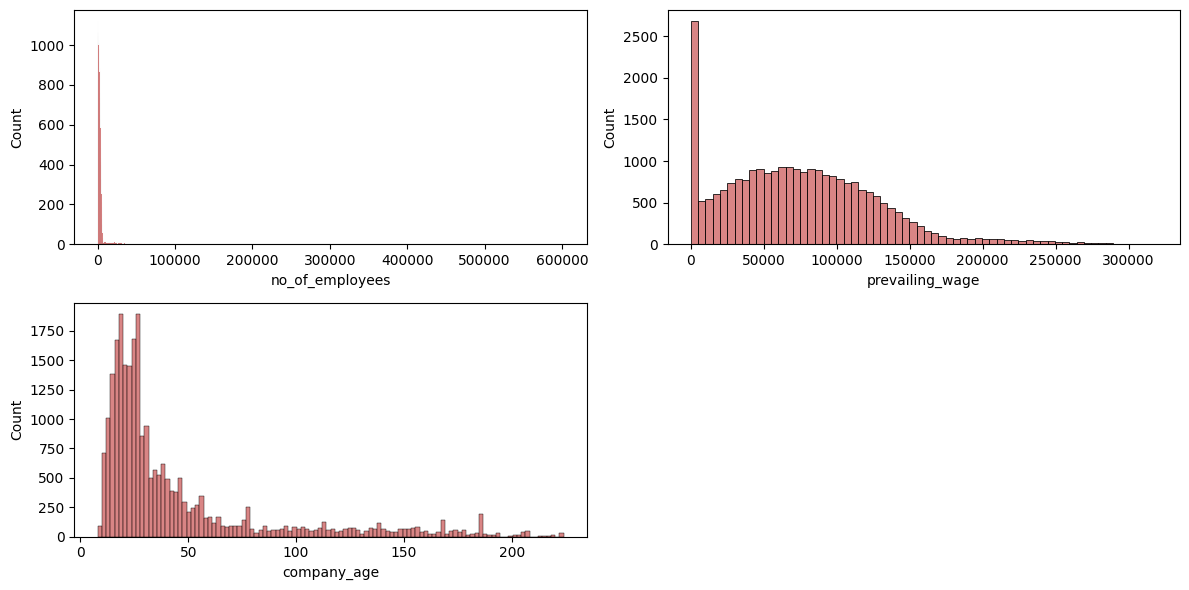

In [24]:
# Check distribution of data 
plt.figure(figsize=(12,6))
for i, col in enumerate(['no_of_employees','prevailing_wage','company_age']):
    plt.subplot(2,2,i+1)
    sns.histplot(x=x[col],color = 'indianred')
    plt.xlabel(col)
    plt.tight_layout()

In [25]:
# No of employees and company age column is skewed
# Apply a power transform featurewise to make data more Gaussian-like
# Power transform are a family of parametric, monotonic transformations that are applied to make data more Gaussian-Like.
# This is useful for modeling issue related to heteroscedasticity(non-constant variance), or other situations where normality is desired. 
# Currently PowerTransformer supports the Box-Cox transform and the Yeo-Johnson transform.


In [26]:
# Checking Skewness
# Skewness refers to a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution, is a set of data.
# If the curve is shifted to the left or to the right, it is said to be skewed. Skewness can be quantified as a represtantion of the extend to which
# a given distribution varies from a normal distribution.
# A Normal distribution has a skew of zero.

In [27]:
# Check Skewness 
x[continous_features].skew(axis=0,skipna=True)

no_of_employees    12.265260
prevailing_wage     0.755776
company_age         2.037301
dtype: float64

In [28]:
# Positively skewed: company_age, no_of_employees.
# We can handle outliers and then check the skewness.

In [29]:
# Apply power Transformation to check if it can reduces the outliers
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
transform_features=['company_age','no_of_employees']
x_copy= pt.fit_transform(x[transform_features])

In [30]:
x_copy =pd.DataFrame(x_copy, columns=transform_features)

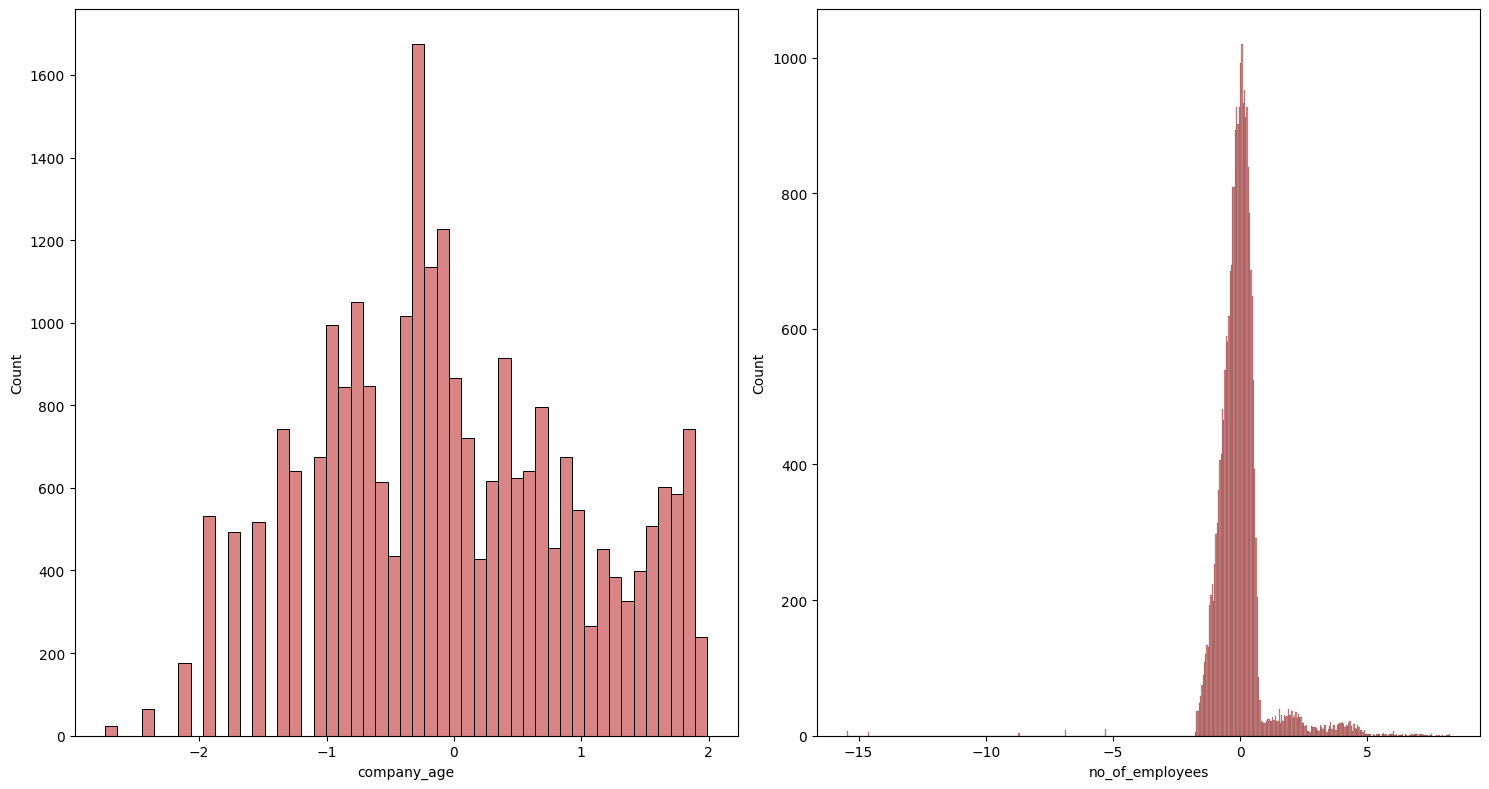

In [31]:
plt.figure(figsize=(15,8))
for i, col in enumerate(transform_features):
    plt.subplot(1,2,i+1)
    sns.histplot(x=x_copy[col],color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

In [32]:
x_copy.skew(axis=0,skipna=True)

company_age        0.103264
no_of_employees    0.399339
dtype: float64

In [33]:
# Here Yeo-Johnson is used to for data transformation and it supports both positive as well as negative skewness


In [34]:
for feature in categorical_features:
    print(feature,':',df[feature].nunique())
    
    

continent : 6
education_of_employee : 4
has_job_experience : 2
requires_job_training : 2
region_of_employment : 5
unit_of_wage : 4
full_time_position : 2
case_status : 2


In [35]:
# Feature Encoding and Scaling
# One Hot encoding for columns which has lesser unique values and not ordinal
# Ordinal encoding for columns which has many unique categories
# ordinal encoding is used as label encoder and is supported for column transformer
# Ordinal encoding is used for ordinal variable, Variable comprises of a finite set of discrete values with a ranked ordering between values. 

# Standard Scalar
# Standardize features by removing the mean and scaling to unit variance

In [36]:
# Power Transformer 
# Is a technique for tranforming numerical input or output variables to have a gaussian or more-gaussian-like probability distribution.

In [37]:
# selecting number of features for preprocessing
num_features = list(x.select_dtypes(exclude="object").columns)

In [38]:
num_features

['no_of_employees', 'prevailing_wage', 'company_age']

In [39]:
# preprocessing using column transform_features
# create column transformer with 3 types of transformers 
or_columns=['has_job_experience','requires_job_training','full_time_position','education_of_employee']
oh_columns=['continent','unit_of_wage','region_of_employment']
transform_columns=['no_of_employees','company_age']

In [40]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler,OrdinalEncoder,PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numeric_tranformer = StandardScaler()
oh_transformer = OneHotEncoder()
ordinal_transformer=OrdinalEncoder()

transform_pipe = Pipeline(
    steps=[('transformer',PowerTransformer(method='yeo-johnson'))
           ]
)

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,oh_columns),
        ("OrdinalEncoder",ordinal_transformer,or_columns),
        ("Transformer",transform_pipe,transform_columns),
        ("StandardScalar",numeric_tranformer,num_features)
    ]
    
)

In [41]:
x = preprocessor.fit_transform(x)

In [42]:
x

array([[ 0.        ,  1.        ,  0.        , ...,  0.38666657,
        -1.39853722, -0.65122993],
       [ 0.        ,  1.        ,  0.        , ..., -0.14228155,
         0.1698353 , -0.53321103],
       [ 0.        ,  1.        ,  0.        , ...,  1.69498375,
         0.91907852, -0.6748337 ],
       ...,
       [ 0.        ,  1.        ,  0.        , ..., -0.19871259,
         1.36027953,  1.63833662],
       [ 0.        ,  1.        ,  0.        , ..., -0.16387483,
         0.22150859,  2.18122353],
       [ 0.        ,  1.        ,  0.        , ..., -0.10805575,
        -0.06776315,  0.45814768]])

In [61]:
# Balancing the data set, making imbalance dataset to balance dataset.
#handle imbalance problem in data, You can use SMOTET technique to handle data imbalance problem. use k nearest neighbour algorithm 

from imblearn.combine import SMOTETomek,SMOTEENN
#Resampling the minority class. The strategy can be changed as required.

smt = SMOTEENN(random_state=42, sampling_strategy = 'minority')

#fit the model to generate the data
x_res,y_res = smt.fit_resample(x,y)

In [62]:
from collections import Counter
print("Orignal dataset shape{}".format(Counter(y)))
print("Resampled dataset shape{}".format(Counter(y_res)))

Orignal dataset shapeCounter({0: 1})
Resampled dataset shapeCounter({0: 1})


In [63]:
# Alternate method for over sampling
# from imblearn.over_sampling import RandomOverSampler
# os = RandomOverSampler(ratio=1)
# x_train_res,y_train_res = os.fit_sample(x,y)
# x_train_res.shape,y_train_res.shape

In [64]:
from sklearn.model_selection import train_test_split
# Spearate dataset into train and test 
x_train, x_test, y_train,y_tst = train_test_split(x_res,y_res,test_size=0.2,random_state=42)
x_train.shape,x_test.shape

((13638, 24), (3410, 24))

In [65]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,\
                            precision_score,recall_score,f1_score,roc_auc_score,roc_curve
from xgboost import XGBClassifier
from catboost import CatBoostClassifier


In [66]:
def evaluate_clf(true,predicted):
    acc = accuracy_score(true, predicted)
    f1 = f1_score(true, predicted)
    precision = precision_score(true, predicted)
    recall = recall_score(true, predicted)
    roc_auc= roc_auc_score(true, predicted)
    return acc,f1,precision,recall,roc_auc
    

In [67]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
    "K-Neighbours Classifier": KNeighborsClassifier(),
    "XGB Classifier": XGBClassifier(),
    "CatBoosting Classifier": CatBoostClassifier(),
    "Support Vector Classifier":SVC(),
    "AdaBoost Classifier": AdaBoostClassifier() 
}

In [78]:
def evaluate_models(x,y,models):
    '''
    This model takes in x and y models dictionary as input
    It Splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns:Dataframe which contains report of all model metrics with cost
    ''' 
    
    # Seperate dataset train and test
    
    X_train, X_test, y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)
    
    model_list = []
    accuracy_list = []
    auc = []

    for i in range(len(list(models))):
        model=list(models.values())[i]
        model.fit(X_train, y_train)
        
        #Training set performance
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        #Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall, model_train_roauc_score = evaluate_clf(y_test,y_test_pred)
        
        #Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocau_score=evaluate_clf(y_test,y_test_pred)
        
        print(list(models.keys())[i])
        model_list.append(list(models.keys())[i])
        
        print("Model performance for training set")
        print("Accuracy: {:4f}".format(model_train_accuracy))
        print("F1-score: {:.4f}".format(model_train_f1))
        print("Precision: {:.4f}".format(model_train_precision))
        print("Recall: {:.4f}".format(model_train_recall))
        print("ROC AUC Score: {:.4f}".format(model_train_rocauc_score))
        
        print("Model performance for Test Set")
        accuracy_list.append(model_test_accuracy)
        auc.append(model_test_roauc_score)
        print("Accuracy: {:.4f}".format(model_test_accuracy))
        print("F1-score: {:.4f}".format(model_test_f1))
        print("Precision: {:.4f}".format(model_test_precision))
        print("Recall: {:.4f}".format(model_test_recall))
        print("Roc AUC Score {:.4f}".format(model_test_roauc_score))
        print("="*35)
        print("\n")
        
        report = pd.DataFrame(list(zip(model_list,accuracy_list)),columns =['Model Name','Accuracy']).sort_values(by=['Accuracy'],ascending = True)
        
        return report
            
    

In [79]:
base_model_report = evaluate_models(x=x_res,y=y_res,models=models)

Random Forest
Model performance for training set
Accuracy: 0.951320
F1-score: 0.9553
Precision: 0.9512
Recall: 0.9594


NameError: name 'model_train_rocauc_score' is not defined